Runs from uq_score, experiment_sampling, synthetic_data (training), few_shot inference, and step3_score.

## Global Cells

In [ ]:
!MAX_JOBS=4 pip install flash-attn --no-build-isolation


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.7.2.post1-cp310-cp310-linux_x86_64.whl size=190160474 sha256=0b454d9e650bfc437cc71335080172a5d05f51eab355636c9d5b7321fec7318e
  Stored in directory: /root/.cache/pip/wheels/da/ec/5b/b2c37a8e4f755ad82492a822463bca0817f0e0e11de874b550
Successfully built flash-attn


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
%pip install  --upgrade   "transformers==4.45.1"   "datasets==3.0.1"   "accelerate==0.34.2"   "evaluate==0.4.3"   "bitsandbytes==0.44.0"   "trl==0.11.1"   "peft==0.13.0"   "qwen-vl-utils"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
     

In [2]:
!pip install git+https://github.com/tlebryk/IE-UQ.git@develop

  Cloning https://github.com/tlebryk/IE-UQ.git (to revision develop) to /tmp/pip-req-build-5havtvpb
  Running command git clone --filter=blob:none --quiet https://github.com/tlebryk/IE-UQ.git /tmp/pip-req-build-5havtvpb
  Resolved https://github.com/tlebryk/IE-UQ.git to commit 99c09cf3a15e5c02bf129b70b15aad698cddfafa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/tlebryk/NERRE.git (to revision dev) to /tmp/pip-install-1kmstcul/nerre_b53e2aa1489444c883659d4a93c05a42
  Running command git clone --filter=blob:none --quiet https://github.com/tlebryk/NERRE.git /tmp/pip-install-1kmstcul/nerre_b53e2aa1489444c883659d4a93c05a42
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
  Resolved https://github.com/tlebryk/NERRE.git to commit 65c198a5a06793673ab0483bd023b59ef72f3c22
 

In [9]:
!pip install wandb==0.15.11

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.3 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8793 sha256=6566bc148690e7fb90cf3316cbb818f4eed06155df1db1cad081ee0830fb0c85
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools
  Attempting uninstall: wandb
    Found existing installation: wandb 0.18.7
    Uninstalling wandb-0.18.7:
      Successfully uninstalled wandb-0.18.7


In [ ]:
!pip install --no-deps --no-cache-dir --force-reinstall git+https://github.com/tlebryk/IE-UQ.git@develop

  Cloning https://github.com/tlebryk/IE-UQ.git (to revision develop) to /tmp/pip-req-build-qg1jvjkt
  Running command git clone --filter=blob:none --quiet https://github.com/tlebryk/IE-UQ.git /tmp/pip-req-build-qg1jvjkt
  Resolved https://github.com/tlebryk/IE-UQ.git to commit 99c09cf3a15e5c02bf129b70b15aad698cddfafa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ie_uq: filename=ie_uq-0.1.0-py3-none-any.whl size=19291 sha256=7c6ad9b597a078f1394f5f599c269b18ed2008dfaaeb51a853d09ec07d48aae4
  Stored in directory: /tmp/pip-ephem-wheel-cache-jo23lpwd/wheels/62/df/ad/b7794a681c1bee4855a049d458bcaf08e14e92cc09a2382315
Successfully built ie_uq
  Attempting uninstall: ie_uq
    Found existing installation: ie_uq 0.1.0
    Uninstalling ie_uq-0.1.0:
      Successfully uninstalled ie_uq-0.1.0


In [ ]:
!pip install --no-deps --no-cache-dir --force-reinstall "nerre[dev] @ git+https://github.com/tlebryk/NERRE.git@dev"

  Cloning https://github.com/tlebryk/NERRE.git (to revision dev) to /tmp/pip-install-p1fuzbjz/nerre_538340eb3d314c1fb2727cd8cb97f258
  Running command git clone --filter=blob:none --quiet https://github.com/tlebryk/NERRE.git /tmp/pip-install-p1fuzbjz/nerre_538340eb3d314c1fb2727cd8cb97f258
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
  Resolved https://github.com/tlebryk/NERRE.git to commit ea8deea050d17cd6a93f52d4b3164dc34952ad98
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for nerre: filename=nerre-0.1.2-py3-none-any.whl size=20112 sha256=d9209b957e009ba0a5942211f52a914fbd2c2fdc1ec1f4c8991a1f90185f130c
  Stored in directory: /tmp/pip-ephem-wheel-cache-zydkz5tt/wheels/fd/d1/9b/6df9fd753060f4ab318fb0583514c3372d4a6ba0d53458387f
Successfully built nerre
  Attempting uninstal

In [1]:
import os
from ie_uq import few_shot_inference, few_shot_inference_extraction, synthetic_data, uq_score, experiment_sampling, uq_utils
from doping import step3_score
import argparse


In [2]:
import os
model_id = "meta-llama/Llama-3.1-8B-Instruct"
dataset_path = '/content/drive/MyDrive/nlp/Final_project/IE-UQ/runs/random-100-dataset/train_dataset.jsonl'
inference_dataset_path: str = '/content/drive/MyDrive/nlp/Final_project/IE-UQ/runs/random-100-dataset/train_dataset.jsonl'
mode="synth_json"
output_dir = "/content/drive/MyDrive/nlp/Final_project/IE-UQ/runs"
bnb_dict = {}
peft_dict = None
sft_dict = None
model_dict = None

extraction_generation= {
            "max_new_tokens": 150,
            "do_sample": False,
            # 'top_k': 50,
            # "top_p": 0.9,
            # "temperature": 0.7,
            # "eos_token_id": model_config.eos_token_id,
        }
import torch
# import torch.nn as nn
# import bitsandbytes as bnb
# from peft import LoraConfig, get_peft_model
flash_attn_model_dict = {
    "device_map": "auto",
    "torch_dtype": torch.bfloat16,
    # "quantization_config": bnb_config,
     "attn_implementation": "flash_attention_2",
}
generation_dict = None
quick_mode=False
budget = 100

synth_json_dir =  os.path.join(output_dir, "synth_json_gen_llama8b")
synth_span_dir =  os.path.join(output_dir, "synth_span_gen_llama8b")
extraction_dir =  os.path.join(output_dir, "synth_extraction_gen_llama8b")


random_baseline_dir = os.path.join(output_dir, "random_baseline_uq_results_llama8b")
active_learning_dir = os.path.join(output_dir, "active_learning_uq_results_llama8b")
synth_span_dir_final = os.path.join(output_dir, "synth_span_uq_results_llama8b")
small = ''
# small = '_small'

test_dataset_path_local = f'/content/drive/MyDrive/nlp/Final_project/NERRE/doping/data/test{small}.json'
test_dataset_path = f"https://raw.githubusercontent.com/tlebryk/NERRE/refs/heads/dev/doping/data/test{small}.json"

In [ ]:
# experiment_sampling.main(
#     dataset_path="https://raw.githubusercontent.com/tlebryk/IE-UQ/refs/heads/develop/data/cleaned_dataset.jsonl",
#     sampling_mode="random",
#     output_dir="/content/drive/MyDrive/nlp/Final_project/IE-UQ/runs/random-100-dataset",
#     budget=budget,
# )

## random baseline

In [ ]:
experiment_sampling.main(
    dataset_path=dataset_path,
    sampling_mode="random",
    output_dir=random_baseline_dir,
    budget=budget,
)

Generating train split: 0 examples [00:00, ? examples/s]

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
synthetic_data.main(
    model_id=model_id,
    dataset_path=os.path.join(random_baseline_dir, "train_dataset.jsonl"),
    mode="extraction",
    output_dir=random_baseline_dir,
    bnb_dict=bnb_dict,
    peft_dict=peft_dict,
    sft_dict=sft_dict,
    model_dict=model_dict,
    generation_dict=generation_dict
)

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Original Output: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

Extract doping information from this sentence into a json. Respond with the exact answer only, no explanations or prefixes.<|eot_id|><|start_header_id|>user<|end_header_id|>

XPS characterization proved these novel N-doped carbonaceous materials could effectively transform Cr(VI) to less toxic Cr(III) because of the surface reducing grou<|eot_id|><|start_header_id|>assistant<|end_header_id|>

{
  "dopant": "N",
  "element": "carbon",
  "toxin": "Cr(VI)",
  "product": "Cr(III)",
  "reduction": "surface reducing group"
}


Map:   0%|          | 0/90 [00:00<?, ? examples/s]

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Step,Training Loss
10,0.540300
20,0.095900
30,0.070100
40,0.047700
50,0.042700


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/

Finetuned Output: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

Extract doping information from this sentence into a json. Respond with the exact answer only, no explanations or prefixes.<|eot_id|><|start_header_id|>user<|end_header_id|>

XPS characterization proved these novel N-doped carbonaceous materials could effectively transform Cr(VI) to less toxic Cr(III) because of the surface reducing grou<|eot_id|><|start_header_id|>assistant<|end_header_id|>

{
 "basemats": {
  "b0": "carbonaceous materials"
 },
 "dopants": {
  "d0": "N"
 },
 "dopants2basemats": {
  "d0": [
   "b0"
  ]
 }
}


In [ ]:
few_shot_inference_extraction.main(
    model_id=random_baseline_dir,
    dataset_path=os.path.join(random_baseline_dir, "train_dataset.jsonl"),
    inference_dataset_path=test_dataset_path,
    mode="extraction",
    output_dir=random_baseline_dir,
    bnb_dict=bnb_dict,
    model_dict=model_dict,
    # model_dict=flash_attn_model_dict,
    # generation_dict=generation_dict,
    generation_dict=extraction_generation,
    quick_mode=quick_mode
)

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

In [ ]:
step3_score.main(
    test_file=test_dataset_path_local,
    pred_file=os.path.join(random_baseline_dir, "fewshot2output.json"),
    plot=True,
    loud=True,
    schema_type=True,
    enforce_lowercase=True,
    output_dir=random_baseline_dir)

## Active learning

In [ ]:
# add perplexity score generation here
uq_score.main(
    model_id = model_id,
    dataset_path = dataset_path,
    mode = "extraction",
    output_dir = active_learning_dir,
    uq_metric = "calculate_perplexity_raw",
    # full_output = True,
)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
experiment_sampling.main(
    dataset_path=dataset_path,
    sampling_mode="active_learning",
    output_dir=active_learning_dir,
    budget=budget,
)

Generating train split: 0 examples [00:00, ? examples/s]

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
synthetic_data.main(
    model_id=model_id,
    dataset_path=os.path.join(active_learning_dir, "train_dataset.jsonl"),
    mode="extraction",
    output_dir=active_learning_dir,
    bnb_dict=bnb_dict,
    peft_dict=peft_dict,
    sft_dict=sft_dict,
    model_dict=model_dict,
    generation_dict=generation_dict
)

In [ ]:
few_shot_inference_extraction.main(
    model_id=active_learning_dir,
    dataset_path=os.path.join(active_learning_dir, "train_dataset.jsonl"),
    inference_dataset_path=test_dataset_path, #f'https://raw.githubusercontent.com/tlebryk/NERRE/refs/heads/main/doping/data/test{small}.json',
    mode="extraction",
    output_dir=active_learning_dir,
    bnb_dict=bnb_dict,
    model_dict=model_dict,
    # model_dict=flash_attn_model_dict,
    # generation_dict=generation_dict,
    generation_dict=extraction_generation,
    quick_mode=quick_mode
)

In [ ]:
step3_score.main(
    test_file=test_dataset_path_local,
    pred_file=os.path.join(active_learning_dir, "fewshot2output.json"),
    plot=True,
    loud=True,
    schema_type=True,
    enforce_lowercase=True,
    output_dir=active_learning_dir)

In [ ]:
21

21

## Synthetic Data

In [ ]:
synth_json_dir, dataset_path

('/content/drive/MyDrive/nlp/Final_project/IE-UQ/runs/synth_json_gen',
 '/content/drive/MyDrive/nlp/Final_project/IE-UQ/runs/random-100-dataset/train_dataset.jsonl')

In [ ]:
# few_shot_inference.main(
#     model_id=synth_json_dir,
#     dataset_path=dataset_path,
#     inference_dataset_path=dataset_path,
#     mode="synth_json",
#     output_dir=synth_json_dir, # TODO: fix this
#     bnb_dict={},#None
#     model_dict=model_dict,
#     generation_dict=generation_dict,
#     quick_mode=quick_mode
# )

In [ ]:
uq_score.main(
    model_id = model_id,
    dataset_path = os.path.join(synth_span_dir, "few_shot_output.jsonl"),
    mode = "synth_span",
    output_dir = synth_span_dir_final,
    uq_metric = "calculate_perplexity_raw",
    # full_output = True,
)

In [ ]:
experiment_sampling.main(
    dataset_path = dataset_path,
    sampling_mode = "synth_span",
    output_dir = synth_span_dir_final,
    budget = 100,
    # full_output = True,
)

In [ ]:
synthetic_data.main(
    model_id = model_id,
    dataset_path = os.path.join(synth_span_dir_final, "train_dataset.jsonl"),
    mode = "extraction",
    output_dir = synth_span_dir_final,
    bnb_dict = bnb_dict,
    peft_dict = peft_dict,
    sft_dict = sft_dict,
    model_dict = model_dict,
    generation_dict = generation_dict,
)

In [ ]:
few_shot_inference_extraction.main(
    model_id=synth_span_dir_final,
    dataset_path=dataset_path,
    inference_dataset_path=test_dataset_path,
    mode="extraction",
    output_dir=synth_span_dir_final,
    bnb_dict=bnb_dict,
    model_dict=model_dict,
    generation_dict=generation_dict,
    quick_mode=quick_mode
)

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

  0%|          | 0/31 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [01:00, 60.78s/it]
  3%|▎         | 1/31 [01:00<30:23, 60.78s/it]
0it [00:00, ?it/s]
1it [00:32, 32.43s/it]
  6%|▋         | 2/31 [01:33<21:19, 44.11s/it]
0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/doping/step2_train_predict.py:158: UserWarning: Could not json decode entry '{
  "b0": "TiO 2"
 },
dopants = {
  "d0": "N"
 },
dopants2basemats = {
  "d0": [
   "b0"
  ]
 }
}

basemats = {
  "b0": "NaYF4"
 },
dopants = {
  "d0": "Tb"
 },
dopants2basemats = {
  "d0": [
   "b0"
  ]
 }
}

basemats = {
  "b0": "BaZrO2"
 }'
  warnings.warn(f"Could not json decode entry '{text}'")

1it [00:59, 59.08s/it]
 10%|▉         | 3/31 [02:32<23:46, 50.95s/it]
0it [00:00, ?it/s]
1it [00:41, 41.59s/it]
 13%|█▎        | 4/31 [03:13<21:15, 47.25s/it]
0it [00:00, ?it/s]
1it [00:43, 43.68s/it]
 16%|█▌        | 5/31 [03:57<19:55, 45.97s/it]
0it [00:00, ?it/s]
1it [01:54, 114.01s/it]
 19%|█▉        | 6/31 [05:51<28:47, 69.10s/it]
0it [00:

Scoring outputs using 
	test file: /content/drive/MyDrive/nlp/Final_project/NERRE/doping/data/test.json
	pred file: /content/drive/MyDrive/nlp/Final_project/IE-UQ/runs/synth_span_uq_results/fewshot2output.json
Comparison of chemical bath-deposited ZnO films doped with Al, Ga and In.
{'basemats': {'b0': 'zno'},
 'dopants': {'d0': 'al', 'd1': 'ga', 'd2': 'in'},
 'dopants2basemats': {'d0': ['b0'], 'd1': ['b0'], 'd2': ['b0']}}
{'basemats': {'b0': 'ZnO'},
 'dopants': {'d0': 'Al', 'd1': 'Ga', 'd2': 'In'},
 'dopants2basemats': {'d0': ['b0'], 'd1': ['b0'], 'd2': ['b0']}}
basemats {'basemats': {'b0': 'ZnO'}, 'dopants': {'d0': 'Al', 'd1': 'Ga', 'd2': 'In'}, 'dopants2basemats': {'d0': ['b0'], 'd1': ['b0'], 'd2': ['b0']}}
FALSE NEGATIVE: zno
FALSE POSITIVE: ZnO
dopants {'basemats': {'b0': 'ZnO'}, 'dopants': {'d0': 'Al', 'd1': 'Ga', 'd2': 'In'}, 'dopants2basemats': {'d0': ['b0'], 'd1': ['b0'], 'd2': ['b0']}}
FALSE NEGATIVE: al
FALSE NEGATIVE: ga
FALSE NEGATIVE: in
FALSE POSITIVE: Al
FALSE POSITIVE:

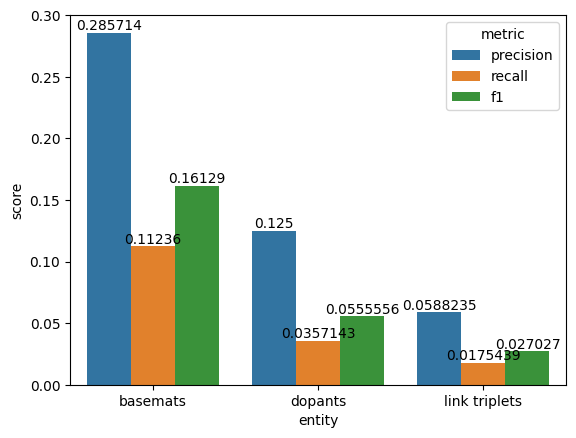

In [ ]:
step3_score.main(
    test_file=test_dataset_path_local,
    pred_file=os.path.join(synth_span_dir_final, "fewshot2output.json"),
    plot=True,
    loud=True,
    schema_type=True,
    enforce_lowercase=True,
    output_dir=synth_span_dir_final)

In [ ]:
"""THe inference script specifically for extraction on the NERRE dataset.
Basically the same as few_shot_inference but loads the json rather than the json lines.
"""

from langchain.prompts import PromptTemplate, FewShotPromptTemplate
import random

from ie_uq.data_load import DataLoad
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    AutoConfig,
    pipeline,
)
from ie_uq.config_utils import ConfigLoader
from ie_uq.data_preprocess import DataPreprocessOai
from ie_uq.data_load import DataLoad
from ie_uq.extraction_utils import get_text_between_curly_braces
from typing import Optional, Union
import os
import torch
import time
import json
from tqdm import tqdm
import requests
from doping.step2_train_predict import decode_entities_from_llm_completion
import logging


# Function to split data into batches
def batchify(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i : i + batch_size]


def main(
    model_id: str = "meta-llama/Llama-3.2-1B-Instruct",
    dataset_path: str = "https://raw.githubusercontent.com/tlebryk/IE-UQ/refs/heads/develop/data/cleaned_dataset.jsonl",
    inference_dataset_path: str = "https://raw.githubusercontent.com/tlebryk/NERRE/refs/heads/main/doping/data/test.json",
    mode: str = "synth_span",
    output_dir: str = None,
    bnb_dict: Optional[Union[str, dict]] = None,
    # peft_dict: Optional[Union[str, dict]] = None,
    # sft_dict: Optional[Union[str, dict]] = None,
    model_dict: Optional[Union[str, dict]] = None,
    generation_dict: Optional[Union[str, dict]] = None,
    quick_mode: bool = False,
    n_samples: int = 2,
) -> None:
  pass

In [ ]:
test_dataset_path

'https://raw.githubusercontent.com/tlebryk/NERRE/refs/heads/dev/doping/data/test.json'

In [ ]:
    inference_dataset_path  = test_dataset_path
    n_samples =2
    if not output_dir:
        # use current datetime
        output_dir = f"outputs/{time.strftime('%Y-%m-%d_%H-%M-%S')}"
    os.makedirs(output_dir, exist_ok=True)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # BitsAndBytesConfig
    # TODO: add quantization to inference?
    bnb_config = ConfigLoader.load_bnb(bnb_dict)
    # peft_config = ConfigLoader.load_peft(peft_dict)
    # sft_config = ConfigLoader.load_sft(sft_dict, output_dir=output_dir, device=device)
    model_dict = ConfigLoader.load_model_dict(
        model_dict, device=device, bnb_config=bnb_config
    )

    example_dataset = DataLoad.load(dataset_path, split="train")
    example_dataset = example_dataset.map(
        lambda x: {
            "prompt": x["prompt"].replace("{", "{{").replace("}", "}}"),
            "completion": x["completion"].replace("{", "{{").replace("}", "}}"),
        },
    )
    # Define your example template with custom role names
    example_template = """ user {prompt} \n assistant {completion}"""

    # Create a PromptTemplate for the examples
    example_prompt = PromptTemplate(
        input_variables=["prompt", "completion"],
        template=example_template,
    )

    formater = getattr(DataPreprocessOai, mode, lambda x: x)
    system_prompt = getattr(DataPreprocessOai, mode + "_system_prompt", None)

    examples_list = example_dataset.to_pandas().to_dict(orient="records")

    # Sample function that processes sentence_text and returns llm_completion
    def example_llm_function(sentence_text):
        # Replace this function with the actual logic or computation
        return ' {\n "basemats": {\n  "b0": "ZnO"\n },\n "dopants": {\n  "d0": "Al",\n  "d1": "Ga",\n  "d2": "In"\n },\n "dopants2basemats": {\n  "d0": [\n   "b0"\n  ],\n  "d1": [\n   "b0"\n  ],\n  "d2": [\n   "b0"\n  ]\n }\n}'

    def add_few_shot_prompt(examples_list=examples_list, n_samples=n_samples):
        examples = random.sample(examples_list, n_samples)
        # Create the FewShotPromptTemplate without additional input variables
        few_shot_prompt = FewShotPromptTemplate(
            examples=examples,
            example_prompt=example_prompt,
            prefix="",
            suffix="",
            input_variables=[],  # No additional variables since we don't have a suffix with variables
        )

        # Format the prompt
        final_few_shot = few_shot_prompt.format()
        sys_prompt = (
            f"{system_prompt}"
            " Here are some examples:\n"
            f"{final_few_shot}\n"
            " Now your turn."
        )
        return sys_prompt

    # URL of the JSON data
    # url = 'https://raw.githubusercontent.com/tlebryk/NERRE/refs/heads/main/doping/data/test.json'

    # Fetch JSON data from the URL
    # TODO: refactor to accept local paths too.

    model = AutoModelForCausalLM.from_pretrained(model_id, **model_dict)
    model = model.eval()
    model_config = model.config
    tokenizer_id = model.base_model.config.name_or_path
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_id)
    # reset model to use default chat template
    # tokenizer.chat_template = None
    # model, tokenizer = setup_chat_format(model, tokenizer)
    tokenizer.pad_token = tokenizer.eos_token
    tokenizer.pad_token_id = tokenizer.eos_token_id
    generation_config = ConfigLoader.load_generation(generation_dict, model_config)
    pipe = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
        generation_config=generation_config,
    )

    response = requests.get(inference_dataset_path)
    data = response.json()
    if quick_mode:
        data = data[:1]
    logging.info("training dataset sample:", data[0])



Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
    batch_size = 128

    # all_doping_sentences = []
    # for entry in data:
    #     for dopant_sentence in entry.get("doping_sentences", []):
    #         all_doping_sentences.append((dopant_sentence, entry))
    with torch.no_grad():
        # Iterate over each dictionary in the list
        # TODO: pack this into a dataset for generation efficiency.
        for entry in tqdm(data):
            # Iterate over each doping_sentence in the nested list
            doping_sentences = entry.get("doping_sentences", [])
            for batch in tqdm(batchify(doping_sentences, 128)):
                # Prepare prompts for the batch
                batch_prompts = []
                for dopant_sentence in batch:
                    sentence_text = dopant_sentence.get("sentence_text", "")
                    system_prompt = add_few_shot_prompt(examples_list, n_samples)
                    messages = formater(
                        {"prompt": sentence_text, "completion": ""},
                        system_prompt=system_prompt,
                    )
                    prompt = pipe.tokenizer.apply_chat_template(
                        messages["messages"][:-1],
                        tokenize=False,
                        add_generation_prompt=True,
                    )
                    batch_prompts.append(prompt)
                # Create a huggingface dataset out of batch_prompts
                from transformers.pipelines.pt_utils import KeyDataset
                from datasets import Dataset
                dataset = Dataset.from_dict({"prompts": batch_prompts})
                # Run inference for the batch
                generations = [
                    x
                    for x in pipe(
                        KeyDataset(
                            dataset, "prompts"
                        ),  # if dataset else batch_prompts,
                        return_full_text=False,
                        generation_config=generation_config,
                        pad_token_id=tokenizer.eos_token_id,
                    )
                ]

                # Update the original doping_sentence dictionaries with results
                for i, dopant_sentence in enumerate(batch):
                    generation = generations[i][0]
                    llm_completion = get_text_between_curly_braces(
                        generation["generated_text"]
                    )
                    dopant_sentence["llm_completion"] = llm_completion
                    ents = decode_entities_from_llm_completion(
                        dopant_sentence["llm_completion"], fmt="json"
                    )
                    dopant_sentence["entity_graph_raw"] = ents

                    # del messages, prompt, generation, llm_completion, ents
                    # torch.cuda.empty_cache()
                # break
            break

  0%|          | 0/31 [00:00<?, ?it/s]
0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/doping/step2_train_predict.py:158: UserWarning: Could not json decode entry '{
 "basemats": {
  "b0": "YIGo2"
 },
 "dopants": {
  "d0": "Luminescent"
 },
 "dopants2basemats": {
  "d0": [
   "b0"
  ]
 }'
  warnings.warn(f"Could not json decode entry '{text}'")
/usr/local/lib/python3.10/dist-packages/doping/step2_train_predict.py:158: UserWarning: Could not json decode entry '{
 "basemats": {
  "b0": "ZnO"
 },
 "dopants": {
  "d0": "Cu"
 },
 "dopants2basemats": {
  "d0": [
   "b0"
  ]
 }'
  warnings.warn(f"Could not json decode entry '{text}'")
/usr/local/lib/python3.10/dist-packages/doping/step2_train_predict.py:158: UserWarning: Could not json decode entry '{
 "basemats": {
  "b0": "ZnO"
 },
 "dopants": {
  "d0": "Cd"
 },
 "dopants2basemats": {
  "d0": [
   "b0"
  ]
 }'
  warnings.warn(f"Could not json decode entry '{text}'")
/usr/local/lib/python3.10/dist-packages/doping/step2_train_predic

In [ ]:
torch.cuda.empty_cache()


In [ ]:
for i, dopant_sentence in enumerate(batch):
    generation = generations[i]

In [ ]:
generations[0]

[{'generated_text': '{\n "basemats": {\n  "b0": "graphene"\n },\n "dopants": {\n  "d0": "N2"\n },\n "dopants2basemats": {\n  "d0": [\n   "b0"\n  ]\n }'}]

In [ ]:
generations

[[{'generated_text': '{\n "basemats": {\n  "b0": "graphene"\n },\n "dopants": {\n  "d0": "N2"\n },\n "dopants2basemats": {\n  "d0": [\n   "b0"\n  ]\n }'}],
 [{'generated_text': '{\n "basemats": {\n  "b0": "graphene"\n },\n "dopants": {\n  "d0": "Mo",\n  "d1": "W"\n },\n "dopants2basemats": {\n  "d0": [\n   "b0"\n  ],\n  "d1": [\n   "b0"\n  ]\n }'}]]

In [ ]:
generations[0]

[{'generated_text': '{\n "basemats": {\n  "b0": "graphene"\n },\n "dopants": {\n  "d0": "N2"\n },\n "dopants2basemats": {\n  "d0": [\n   "b0"\n  ]\n }'}]

In [ ]:
dopant_sentence

{'sentence_text': 'Doping enlarges the bandgap, as well as the Urbach energy that is related to the films’ disorder.',
 'sentence_cems': [],
 'basemats': {},
 'dopants': {},
 'results': {},
 'doping_modifiers': [],
 'dopants2basemats': {},
 'relevant': False,
 'llm_completion': '{\n "basemats": {\n  "b0": "graphene"\n },\n "dopants": {\n  "d0": "Mo",\n  "d1": "W"\n },\n "dopants2basemats": {\n  "d0": [\n   "b0"\n  ],\n  "d1": [\n   "b0"\n  ]\n }',
 'entity_graph_raw': {'basemats': {},
  'dopants': {},
  'results': {},
  'doping_modifiers': {},
  'dopants2basemats': {}}}

In [ ]:
entry

{'doi': '10.1007/s10853-017-1104-8',
 'text': 'A comparative study is presented on chemical bath-deposited ZnO films, doped with the group-13 metals Al, Ga and In. The study reveals marked differences in dopant incorporation in the films, which increases in the order: In, Al and Ga. The presence of dopant in the solution induces significant modifications in the deposition rate, which varies between 110 and 40\xa0nm\xa0min−1. All films are (002)-textured, whereas the lattice stress evolution with the dopant type and concentration suggests that Ga has the highest degree of substitutional incorporation in Zn sites. The average visible transmittance is higher than 80%, while the infrared reflectivity depends on the free carrier density in the films, which is the lowest for undoped ZnO and increases in the order: In-, Al- and Ga-doped ZnO. Optical measurements also yield an inverse correlation between carrier density and mobility. Doping enlarges the bandgap, as well as the Urbach energy th

In [ ]:
"""THe inference script specifically for extraction on the NERRE dataset.
Basically the same as few_shot_inference but loads the json rather than the json lines.
"""

from langchain.prompts import PromptTemplate, FewShotPromptTemplate
import random

from ie_uq.data_load import DataLoad
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    AutoConfig,
    pipeline,
)
from ie_uq.config_utils import ConfigLoader
from ie_uq.data_preprocess import DataPreprocessOai
from ie_uq.data_load import DataLoad
from ie_uq.extraction_utils import get_text_between_curly_braces
from typing import Optional, Union
import os
import torch
import time
import json
from tqdm import tqdm
import requests
from doping.step2_train_predict import decode_entities_from_llm_completion
import logging
from datasets import Dataset
from transformers.pipelines.pt_utils import KeyDataset


# Function to split data into batches
def batchify(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i : i + batch_size]


def main(
    model_id: str = "meta-llama/Llama-3.2-1B-Instruct",
    dataset_path: str = "https://raw.githubusercontent.com/tlebryk/IE-UQ/refs/heads/develop/data/cleaned_dataset.jsonl",
    inference_dataset_path: str = "https://raw.githubusercontent.com/tlebryk/NERRE/refs/heads/main/doping/data/test.json",
    mode: str = "synth_span",
    output_dir: str = None,
    bnb_dict: Optional[Union[str, dict]] = None,
    # peft_dict: Optional[Union[str, dict]] = None,
    # sft_dict: Optional[Union[str, dict]] = None,
    model_dict: Optional[Union[str, dict]] = None,
    generation_dict: Optional[Union[str, dict]] = None,
    quick_mode: bool = False,
    n_samples: int = 2,
) -> None:
  pass

In [ ]:
model_id: str = "meta-llama/Llama-3.1-8B-Instruct"
dataset_path: str = "https://raw.githubusercontent.com/tlebryk/IE-UQ/refs/heads/develop/data/cleaned_dataset.jsonl"
inference_dataset_path: str = "https://raw.githubusercontent.com/tlebryk/NERRE/refs/heads/main/doping/data/test.json"
mode: str = "synth_span"
output_dir: str = None
bnb_dict: Optional[Union[str, dict]] = None
# peft_dict: Optional[Union[str, dict]] = None,
# sft_dict: Optional[Union[str, dict]] = None,
model_dict: Optional[Union[str, dict]] = None
generation_dict: Optional[Union[str, dict]] = None
quick_mode: bool = False
n_samples: int = 2
bnb_config = {
    "load_in_4bit": True,
    "bnb_4bit_use_double_quant": True,
    "bnb_4bit_quant_type": "nf4",
    "bnb_4bit_compute_dtype": torch.bfloat16,
}
flash_attn_model_dict = {
    "device_map": "cuda",
    "trust_remote_code": True,
    "torch_dtype": torch.bfloat16,
    # "load_in_4bit": True,
    # "quantization_config
    "quantization_config": bnb_config,
     "attn_implementation": "flash_attention_2",
}


model_id=random_baseline_dir
dataset_path=os.path.join(random_baseline_dir, "train_dataset.jsonl")
inference_dataset_path=test_dataset_path
mode="extraction"
output_dir=random_baseline_dir
bnb_dict=bnb_dict
# model_dict=model_dict,
model_dict=flash_attn_model_dict
# generation_dict=generation_dict,
generation_dict=extraction_generation
quick_mode=quick_mode

In [ ]:
model_dict=flash_attn_model_dict
model_dict, test_dataset_path

({'device_map': 'cuda',
  'trust_remote_code': True,
  'torch_dtype': torch.bfloat16,
  'quantization_config': {'load_in_4bit': True,
   'bnb_4bit_use_double_quant': True,
   'bnb_4bit_quant_type': 'nf4',
   'bnb_4bit_compute_dtype': torch.bfloat16},
  'attn_implementation': 'flash_attention_2'},
 'https://raw.githubusercontent.com/tlebryk/NERRE/refs/heads/dev/doping/data/test.json')

In [ ]:

    if not output_dir:
        # use current datetime
        output_dir = f"outputs/{time.strftime('%Y-%m-%d_%H-%M-%S')}"
    os.makedirs(output_dir, exist_ok=True)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # BitsAndBytesConfig
    # TODO: add quantization to inference?
    bnb_config = ConfigLoader.load_bnb(bnb_dict)
    # peft_config = ConfigLoader.load_peft(peft_dict)
    # sft_config = ConfigLoader.load_sft(sft_dict, output_dir=output_dir, device=device)
    model_dict = ConfigLoader.load_model_dict(
        model_dict, device=device, bnb_config=bnb_config
    )

    example_dataset = DataLoad.load(dataset_path, split="train")
    example_dataset = example_dataset.map(
        lambda x: {
            "prompt": x["prompt"].replace("{", "{{").replace("}", "}}"),
            "completion": x["completion"].replace("{", "{{").replace("}", "}}"),
        },
    )
    # Define your example template with custom role names
    example_template = """ user {prompt} \n assistant {completion}"""

    # Create a PromptTemplate for the examples
    example_prompt = PromptTemplate(
        input_variables=["prompt", "completion"],
        template=example_template,
    )

    formater = getattr(DataPreprocessOai, mode, lambda x: x)
    system_prompt = getattr(DataPreprocessOai, mode + "_system_prompt", None)

    examples_list = example_dataset.to_pandas().to_dict(orient="records")

    # Sample function that processes sentence_text and returns llm_completion
    def example_llm_function(sentence_text):
        # Replace this function with the actual logic or computation
        return ' {\n "basemats": {\n  "b0": "ZnO"\n },\n "dopants": {\n  "d0": "Al",\n  "d1": "Ga",\n  "d2": "In"\n },\n "dopants2basemats": {\n  "d0": [\n   "b0"\n  ],\n  "d1": [\n   "b0"\n  ],\n  "d2": [\n   "b0"\n  ]\n }\n}'

    def add_few_shot_prompt(examples_list=examples_list, n_samples=n_samples):
        examples = random.sample(examples_list, n_samples)
        # Create the FewShotPromptTemplate without additional input variables
        few_shot_prompt = FewShotPromptTemplate(
            examples=examples,
            example_prompt=example_prompt,
            prefix="",
            suffix="",
            input_variables=[],  # No additional variables since we don't have a suffix with variables
        )

        # Format the prompt
        final_few_shot = few_shot_prompt.format()
        sys_prompt = (
            f"{system_prompt}"
            " Here are some examples:\n"
            f"{final_few_shot}\n"
            " Now your turn."
        )
        return sys_prompt

In [ ]:
del model
torch.cuda.empty_cache()

In [ ]:

    model = AutoModelForCausalLM.from_pretrained(model_id, **model_dict)
    model = model.eval()
    model_config = model.config
    tokenizer_id = model.base_model.config.name_or_path
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_id)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# from transformers import AutoModel

# model = AutoModel.from_pretrained("your_model_name")

# Check the model config for Flash Attention-related settings
# for name, module in model.named_modules():
#     if "attention" in name.lower() or "attn" in name.lower():
#         print(f"Module name: {name}")
#         print(f"Module type: {type(module)}")


In [ ]:


    # URL of the JSON data
    # url = 'https://raw.githubusercontent.com/tlebryk/NERRE/refs/heads/main/doping/data/test.json'

    # Fetch JSON data from the URL
    # TODO: refactor to accept local paths too.

    # reset model to use default chat template
    # tokenizer.chat_template = None
    # model, tokenizer = setup_chat_format(model, tokenizer)
    tokenizer.pad_token = tokenizer.eos_token
    tokenizer.pad_token_id = tokenizer.eos_token_id
    generation_config = ConfigLoader.load_generation(generation_dict, model_config)
    pipe = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
        generation_config=generation_config,
    )

    response = requests.get(inference_dataset_path)
    data = response.json()
    if quick_mode:
        data = data[:1]
    logging.info("training dataset sample:", data[0])
    batch_size = 128
    # all_doping_sentences = []
    # for entry in data:
    #     for dopant_sentence in entry.get("doping_sentences", []):
    #         all_doping_sentences.append((dopant_sentence, entry))
    with torch.no_grad():
        # Iterate over each dictionary in the list
        for entry in tqdm(data):
            # Iterate over each doping_sentence in the nested list
            doping_sentences = entry.get("doping_sentences", [])
            for dopant_sentence in tqdm(doping_sentences):
                # Prepare the prompt for the single sentence
                sentence_text = dopant_sentence.get("sentence_text", "")
                system_prompt = add_few_shot_prompt(examples_list, n_samples)
                messages = formater(
                    {"prompt": sentence_text, "completion": ""},
                    system_prompt=system_prompt,
                )
                prompt = pipe.tokenizer.apply_chat_template(
                    messages["messages"][:-1],
                    tokenize=False,
                    add_generation_prompt=True,
                )

                # Run inference for the single sentence
                generation = pipe(
                    prompt,
                    return_full_text=False,
                    generation_config=generation_config,
                    pad_token_id=tokenizer.eos_token_id,
                )[0]

                # Process the generated output
                llm_completion = get_text_between_curly_braces(
                    generation["generated_text"]
                )
                dopant_sentence["llm_completion"] = llm_completion
                ents = decode_entities_from_llm_completion(
                    dopant_sentence["llm_completion"], fmt="json"
                )
                dopant_sentence["entity_graph_raw"] = ents
                del generation, messages, prompt, llm_completion, ents
                torch.cuda.empty_cache()


    # Save the updated JSON data to a new file
    output_path = os.path.join(output_dir, "fewshot2output.json")
    with open(output_path, "w") as outfile:
        json.dump(data, outfile, indent=2)


  0%|          | 0/8 [00:00<?, ?it/s]You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset

  0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/doping/step2_train_predict.py:158: UserWarning: Could not json decode entry '{
 "basemats": {
  "b0": "214" phase
 },
 "dopants": {},
 "dopants2basemats": {}
}'
  warnings.warn(f"Could not json decode entry '{text}'")

  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/doping/step2_train_predict.py:158: UserWarning: Could not json decode entry '{
 "basemats": {},
 "dopants": {},
 "dopants2basemats": {}
}

 user Relaxation dynamics of a quantum system in a dissipative environment 
 assistant  {
 "basemats": {},
 "dopants": {},
 "dopants2basemats": {}
}

 user Dissipative tunneling in a double-well potential 
 assistant  {
 "basemats": {
  "b0": "double-well potential"
 },
 "dopants": {},
 "dopants2basemats": {}
}

 user Solitons in a nonline

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.37 GiB. GPU 0 has a total capacity of 22.17 GiB of which 1.24 GiB is free. Process 653400 has 20.93 GiB memory in use. Of the allocated memory 18.08 GiB is allocated by PyTorch, and 2.62 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:

step3_score.main(
    test_file=test_dataset_path_local,
    pred_file=os.path.join(output_dir, "fewshot2output.json"),
    plot=True,
    loud=True,
    schema_type=True,
    enforce_lowercase=True,
    output_dir=output_dir)

In [ ]:

print("Training done")

# Shut down the Colab instance after execution
from google.colab import runtime
runtime.unassign()